In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np

from scipy.stats import kendalltau
from sklearn.metrics import mean_squared_error

rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
rcParams['figure.dpi'] = 300

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

/home/gokul/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
hue_order = ["LMI", "KSG", "MINE", "InfoNCE"]
c6 = ['#c4bae2','#40ada6','#3c4ebf',  
        '#e3a600', '#edb1a3', '#d6543a',]

palette = [c6[c] for c in range(6) if c in [1,2,3,5]]

def letter_annotation(ax, xoffset, yoffset, letter):
     ax.text(xoffset, yoffset, letter, transform=ax.transAxes,
             size=14, weight='bold')

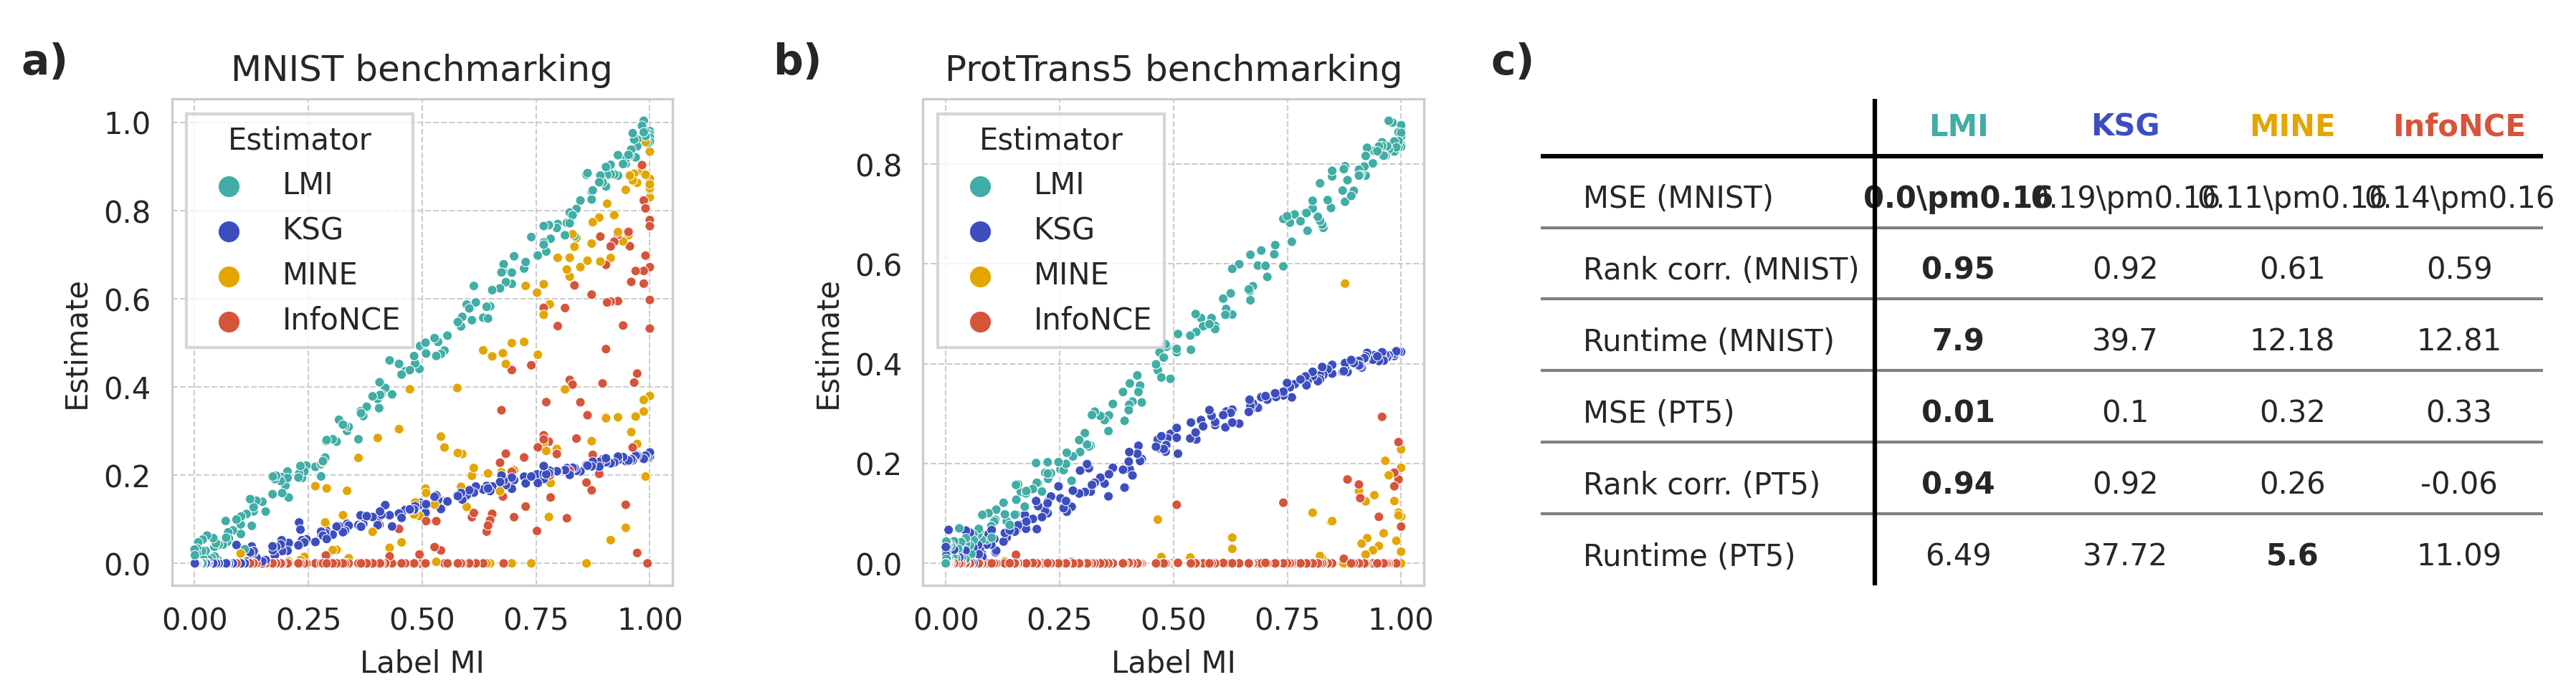

In [13]:
rcParams['grid.linewidth'] = 0.5
rcParams['grid.linestyle'] = 'dashed'
rcParams['legend.fancybox'] = False

fig = plt.figure(figsize=(12, 3), dpi=300)

mnist, blank, pt5, table = fig.subfigures(1, 4, wspace=-0.15,
                                  width_ratios= (1, .5, 1, 2))

ax = table.subplots()
ax_pt5 = pt5.subplots()
ax_mnist = mnist.subplots()

letter_annotation(ax, -0.05, 1.05, 'c)')
letter_annotation(ax_pt5, -0.3, 1.05, 'b)')
letter_annotation(ax_mnist, -0.3, 1.05, 'a)')

ncols = 4
nrows = 6

ax.set_ylim(-0.2, 3.2)
ax.set_xlim(0, 6.)

col_start = 3
row_size = .5

positions = [2.5, 3.5, 4.5, 5.5]

for i, c in enumerate(hue_order):
    ax.annotate(
            xy=(positions[i], nrows*row_size),
            text = hue_order[i],
            ha='center',
            va='center',
            weight='bold',
            color=palette[i]
        )
    
df = pd.read_csv('B_MNIST.csv', index_col=0)
df = df.fillna(0)
df = df.rename(columns={'Measure':'Estimator'})
df['Estimator'] = df['Estimator'].str.replace('LMI-Cross', 'LMI')
df['Estimate'] = [max(x, 0) for x in df['Estimate'].values]
df = df[df['Estimator'].isin(hue_order)]

#################################
########## SCATTERPLOT ##########
#################################
sns.set_style('whitegrid')
sns.scatterplot(data=df, x="Label MI", y="Estimate", hue="Estimator",
                hue_order=hue_order,
               palette=palette, s=10, ax=ax_mnist)
ax_mnist.set_title('MNIST benchmarking')

# Add MSE

# row label
ax.annotate(
        xy=(0.25, row_size*(nrows-1)),
        text='MSE (MNIST)',
        ha='left',
        va='center'
        )
best_val = min([mean_squared_error(df[df["Estimator"] == est]["Label MI"], 
                           df[df["Estimator"] == est]["Estimate"]) for est in hue_order])
for j, est in enumerate(hue_order):
    val = mean_squared_error(df[df["Estimator"] == est]["Label MI"], 
                           df[df["Estimator"] == est]["Estimate"])

    weight = 'normal'*(best_val!=val) + 'bold'*(best_val==val)
    ax.annotate(
            xy=(positions[j], row_size*(nrows-1)),
            text = str(np.round(val, 2)) + '\\pm' + str(np.round(sd, 2)),
            ha='center',
            va='center',
            weight=weight
        )
    
# Add Kendall

# Add Kendall

# row label
ax.annotate(
        xy=(0.25, row_size*(nrows-2)),
        text='Rank corr. (MNIST)',
        ha='left',
        va='center'
        )

best_val = max([kendalltau(df[df["Estimator"] == est]["Label MI"], 
                           df[df["Estimator"] == est]["Estimate"])[0] for est in hue_order])

for j, est in enumerate(hue_order):
    val = kendalltau(df[df["Estimator"] == est]["Label MI"], 
                           df[df["Estimator"] == est]["Estimate"])[0]
    weight = 'normal'*(best_val!=val) + 'bold'*(best_val==val) 
    ax.annotate(
            xy=(positions[j], row_size*(nrows-2)),
            text = np.round(val, 2),
            ha='center',
            va='center',
            weight=weight
        )
    
# Add time

# row label
ax.annotate(
        xy=(0.25, row_size*(nrows-3)),
        text='Runtime (MNIST)',
        ha='left',
        va='center'
        )

best_val = df.groupby('Estimator')['Time'].mean().min()
for j, est in enumerate(hue_order):
    val = df[df["Estimator"] == est]["Time"].mean()
    weight = 'normal'*(best_val!=val) + 'bold'*(best_val==val)
    ax.annotate(
            xy=(positions[j], row_size*(nrows-3)),
            text = np.round(val ,2),
            ha='center',
            va='center',
            weight=weight)


df = pd.read_csv('B_species_mixing.csv', index_col=0)
df = df.fillna(0)
df = df.rename(columns={'Measure':'Estimator'})
df['Estimator'] = df['Estimator'].str.replace('SIMI-Cross', 'SIMI')
df = df[df['Estimator'].isin(hue_order)]
df['Estimate'] = [max(x, 0) for x in df['Estimate'].values]


#################################
########## SCATTERPLOT ##########
#################################
sns.set_style('whitegrid')
sns.scatterplot(data=df, x="Label MI", y="Estimate", hue="Estimator",
                hue_order=hue_order,
               palette=palette, s=10, ax=ax_pt5)
ax_pt5.set_title('ProtTrans5 benchmarking')




############################
##### PT5 Table entries ####
############################

# Add MSE

# row label
ax.annotate(
        xy=(0.25, row_size*(nrows-4)),
        text='MSE (PT5)',
        ha='left',
        va='center'
        )
best_val = min([mean_squared_error(df[df["Estimator"] == est]["Label MI"], 
                           df[df["Estimator"] == est]["Estimate"]) for est in hue_order])
for j, est in enumerate(hue_order):
    val = mean_squared_error(df[df["Estimator"] == est]["Label MI"], 
                           df[df["Estimator"] == est]["Estimate"])
    weight = 'normal'*(best_val!=val) + 'bold'*(best_val==val)
    ax.annotate(
            xy=(positions[j], row_size*(nrows-4)),
            text = np.round(val, 2),
            ha='center',
            va='center',
            weight=weight
        )
    
# Add Kendall

# row label
ax.annotate(
        xy=(0.25, row_size*(nrows-5)),
        text='Rank corr. (PT5)',
        ha='left',
        va='center'
        )

best_val = max([kendalltau(df[df["Estimator"] == est]["Label MI"], 
                           df[df["Estimator"] == est]["Estimate"])[0] for est in hue_order])

for j, est in enumerate(hue_order):
    val = kendalltau(df[df["Estimator"] == est]["Label MI"], 
                           df[df["Estimator"] == est]["Estimate"])[0]
    weight = 'normal'*(best_val!=val) + 'bold'*(best_val==val) 
    ax.annotate(
            xy=(positions[j], row_size*(nrows-5)),
            text = np.round(val, 2),
            ha='center',
            va='center',
            weight=weight
        )
    
# Add time

# row label
ax.annotate(
        xy=(0.25, row_size*(nrows-6)),
        text='Runtime (PT5)',
        ha='left',
        va='center'
        )

best_val = df.groupby('Estimator')['Time'].mean().min()
for j, est in enumerate(hue_order):
    val = df[df["Estimator"] == est]["Time"].mean()
    weight = 'normal'*(best_val!=val) + 'bold'*(best_val==val)
    ax.annotate(
            xy=(positions[j], row_size*(nrows-6)),
            text = np.round(val ,2),
            ha='center',
            va='center',
            weight=weight)
    
# Add dividing lines
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], 
        [nrows*row_size-0.2, nrows*row_size-0.2], lw=1.5, color='black', marker='', zorder=4)

ax.plot([2,2], 
        [ax.get_ylim()[0], ax.get_ylim()[1]], lw=1.5, 
        color='black', marker='', zorder=4)

for x in range(1, nrows):
    ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], 
            [x*row_size-0.2, x*row_size-0.2], 
            lw=1., color='gray', ls='-', zorder=3 , marker='')
        
ax.set_axis_off()

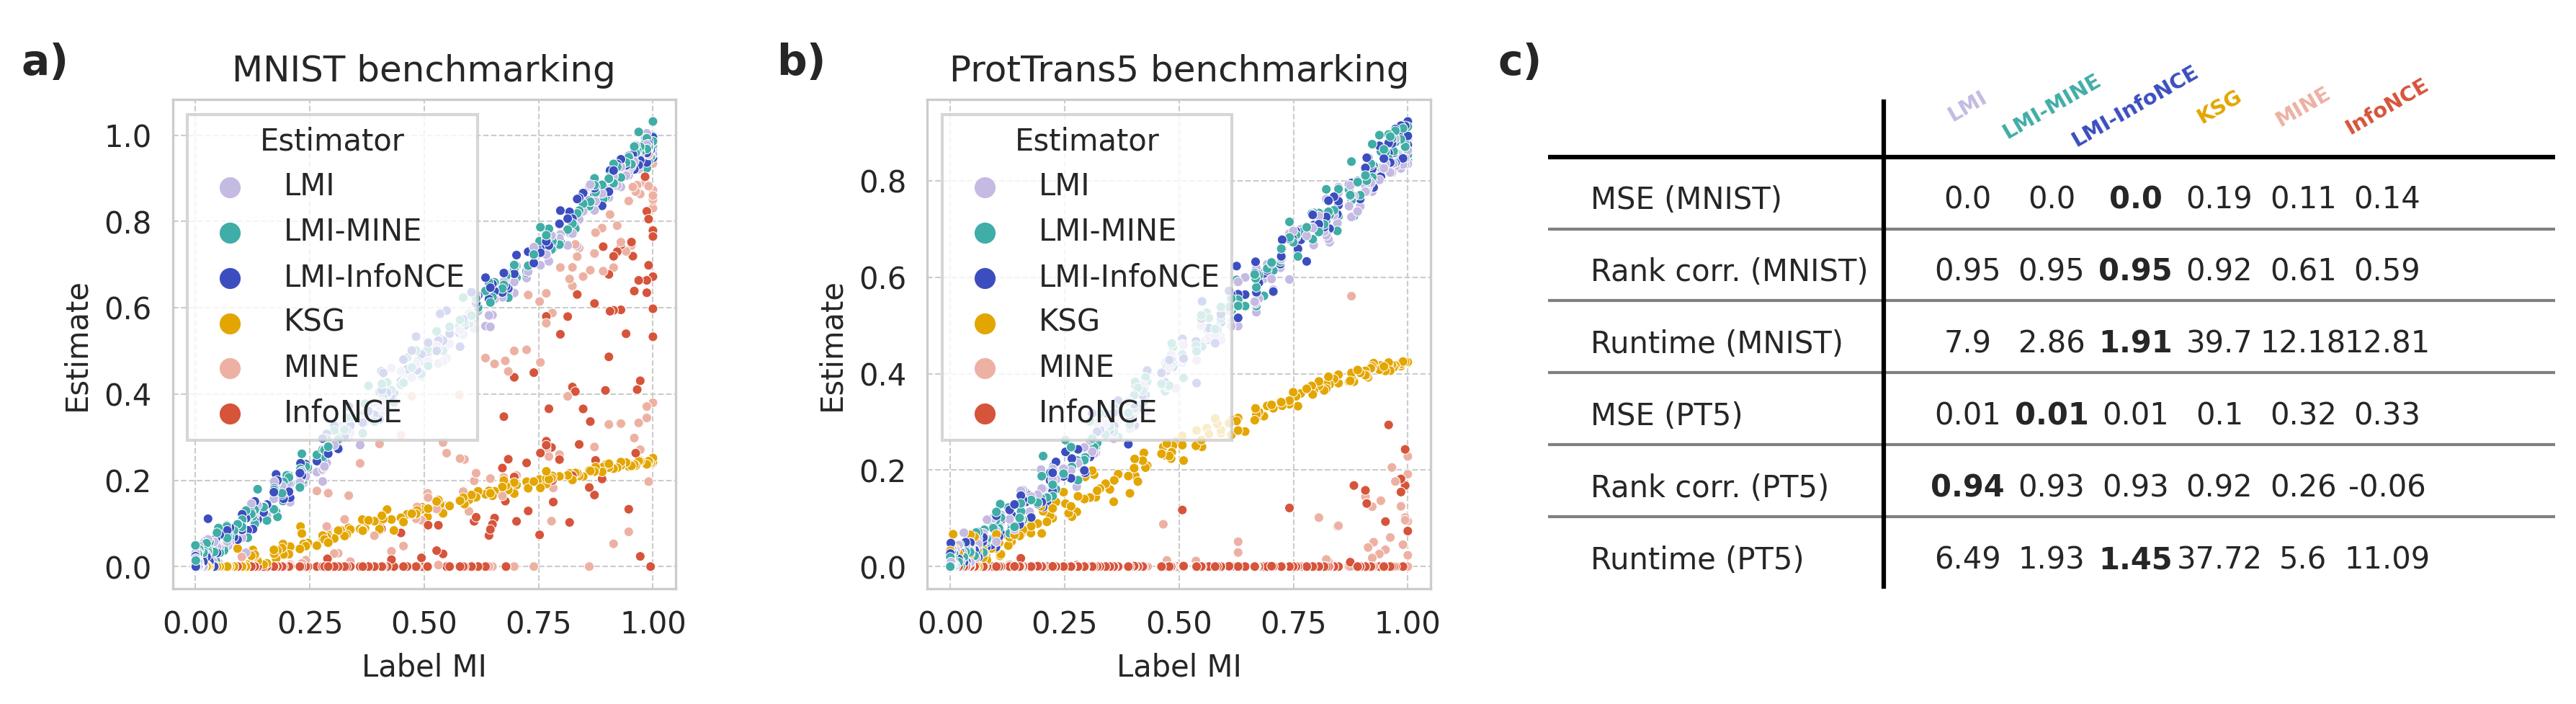

In [9]:
rcParams['grid.linewidth'] = 0.5
rcParams['grid.linestyle'] = 'dashed'
rcParams['legend.fancybox'] = False

hue_order = ["LMI", "LMI-MINE", "LMI-InfoNCE", "KSG", "MINE", "InfoNCE"]
palette = c6

fig = plt.figure(figsize=(12, 3), dpi=300)

mnist, blank, pt5, table = fig.subfigures(1, 4, wspace=-0.15,
                                  width_ratios= (1, .5, 1, 2))

ax = table.subplots()
ax_pt5 = pt5.subplots()
ax_mnist = mnist.subplots()

letter_annotation(ax, -0.05, 1.05, 'c)')
letter_annotation(ax_pt5, -0.3, 1.05, 'b)')
letter_annotation(ax_mnist, -0.3, 1.05, 'a)')

ncols = 4
nrows = 6

ax.set_ylim(-0.2, 3.2)
ax.set_xlim(0, 6.)

col_start = 3
row_size = .5

positions = [2.5, 3, 3.5, 4.0, 4.5, 5]

for i, c in enumerate(hue_order):
    ax.annotate(
            xy=(positions[i], (nrows+0.3)*row_size),
            text = hue_order[i],
            ha='center',
            va='center',
            weight='bold',
            color=palette[i],
            rotation=30, fontsize='x-small'
        )
    
df = pd.read_csv('B_MNIST.csv', index_col=0)
df = df.fillna(0)
df = df.rename(columns={'Measure':'Estimator'})
df['Estimator'] = df['Estimator'].str.replace('LMI-Cross', 'LMI')
df['Estimate'] = [max(x, 0) for x in df['Estimate'].values]
df = df

#################################
########## SCATTERPLOT ##########
#################################
sns.set_style('whitegrid')
sns.scatterplot(data=df, x="Label MI", y="Estimate", hue="Estimator",
                hue_order=hue_order,
               palette=palette, s=10, ax=ax_mnist)
ax_mnist.set_title('MNIST benchmarking')

# Add MSE

# row label
ax.annotate(
        xy=(0.25, row_size*(nrows-1)),
        text='MSE (MNIST)',
        ha='left',
        va='center'
        )
best_val = min([mean_squared_error(df[df["Estimator"] == est]["Label MI"], 
                           df[df["Estimator"] == est]["Estimate"]) for est in hue_order])
for j, est in enumerate(hue_order):
    val = mean_squared_error(df[df["Estimator"] == est]["Label MI"], 
                           df[df["Estimator"] == est]["Estimate"])
    weight = 'normal'*(best_val!=val) + 'bold'*(best_val==val)
    ax.annotate(
            xy=(positions[j], row_size*(nrows-1)),
            text = np.round(val, 2),
            ha='center',
            va='center',
            weight=weight
        )
    
# Add Kendall

# Add Kendall

# row label
ax.annotate(
        xy=(0.25, row_size*(nrows-2)),
        text='Rank corr. (MNIST)',
        ha='left',
        va='center'
        )

best_val = max([kendalltau(df[df["Estimator"] == est]["Label MI"], 
                           df[df["Estimator"] == est]["Estimate"])[0] for est in hue_order])

for j, est in enumerate(hue_order):
    val = kendalltau(df[df["Estimator"] == est]["Label MI"], 
                           df[df["Estimator"] == est]["Estimate"])[0]
    weight = 'normal'*(best_val!=val) + 'bold'*(best_val==val) 
    ax.annotate(
            xy=(positions[j], row_size*(nrows-2)),
            text = np.round(val, 2),
            ha='center',
            va='center',
            weight=weight
        )
    
# Add time

# row label
ax.annotate(
        xy=(0.25, row_size*(nrows-3)),
        text='Runtime (MNIST)',
        ha='left',
        va='center'
        )

best_val = df.groupby('Estimator')['Time'].mean().min()
for j, est in enumerate(hue_order):
    val = df[df["Estimator"] == est]["Time"].mean()
    weight = 'normal'*(best_val!=val) + 'bold'*(best_val==val)
    ax.annotate(
            xy=(positions[j], row_size*(nrows-3)),
            text = np.round(val ,2),
            ha='center',
            va='center',
            weight=weight)


df = pd.read_csv('B_species_mixing.csv', index_col=0)
df = df.fillna(0)
df = df.rename(columns={'Measure':'Estimator'})
df['Estimator'] = df['Estimator'].str.replace('SIMI-Cross', 'SIMI')
df = df[df['Estimator'].isin(hue_order)]
df['Estimate'] = [max(x, 0) for x in df['Estimate'].values]


#################################
########## SCATTERPLOT ##########
#################################
sns.set_style('whitegrid')
sns.scatterplot(data=df, x="Label MI", y="Estimate", hue="Estimator",
                hue_order=hue_order,
               palette=palette, s=10, ax=ax_pt5)
ax_pt5.set_title('ProtTrans5 benchmarking')




############################
##### PT5 Table entries ####
############################

# Add MSE

# row label
ax.annotate(
        xy=(0.25, row_size*(nrows-4)),
        text='MSE (PT5)',
        ha='left',
        va='center'
        )
best_val = min([mean_squared_error(df[df["Estimator"] == est]["Label MI"], 
                           df[df["Estimator"] == est]["Estimate"]) for est in hue_order])
for j, est in enumerate(hue_order):
    val = mean_squared_error(df[df["Estimator"] == est]["Label MI"], 
                           df[df["Estimator"] == est]["Estimate"])
    weight = 'normal'*(best_val!=val) + 'bold'*(best_val==val)
    ax.annotate(
            xy=(positions[j], row_size*(nrows-4)),
            text = np.round(val, 2),
            ha='center',
            va='center',
            weight=weight
        )
    
# Add Kendall

# row label
ax.annotate(
        xy=(0.25, row_size*(nrows-5)),
        text='Rank corr. (PT5)',
        ha='left',
        va='center'
        )

best_val = max([kendalltau(df[df["Estimator"] == est]["Label MI"], 
                           df[df["Estimator"] == est]["Estimate"])[0] for est in hue_order])

for j, est in enumerate(hue_order):
    val = kendalltau(df[df["Estimator"] == est]["Label MI"], 
                           df[df["Estimator"] == est]["Estimate"])[0]
    weight = 'normal'*(best_val!=val) + 'bold'*(best_val==val) 
    ax.annotate(
            xy=(positions[j], row_size*(nrows-5)),
            text = np.round(val, 2),
            ha='center',
            va='center',
            weight=weight
        )
    
# Add time

# row label
ax.annotate(
        xy=(0.25, row_size*(nrows-6)),
        text='Runtime (PT5)',
        ha='left',
        va='center'
        )

best_val = df.groupby('Estimator')['Time'].mean().min()
for j, est in enumerate(hue_order):
    val = df[df["Estimator"] == est]["Time"].mean()
    weight = 'normal'*(best_val!=val) + 'bold'*(best_val==val)
    ax.annotate(
            xy=(positions[j], row_size*(nrows-6)),
            text = np.round(val ,2),
            ha='center',
            va='center',
            weight=weight)
    
# Add dividing lines
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], 
        [nrows*row_size-0.2, nrows*row_size-0.2], lw=1.5, color='black', marker='', zorder=4)

ax.plot([2,2], 
        [ax.get_ylim()[0], ax.get_ylim()[1]], lw=1.5, 
        color='black', marker='', zorder=4)

for x in range(1, nrows):
    ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], 
            [x*row_size-0.2, x*row_size-0.2], 
            lw=1., color='gray', ls='-', zorder=3 , marker='')
        
ax.set_axis_off()

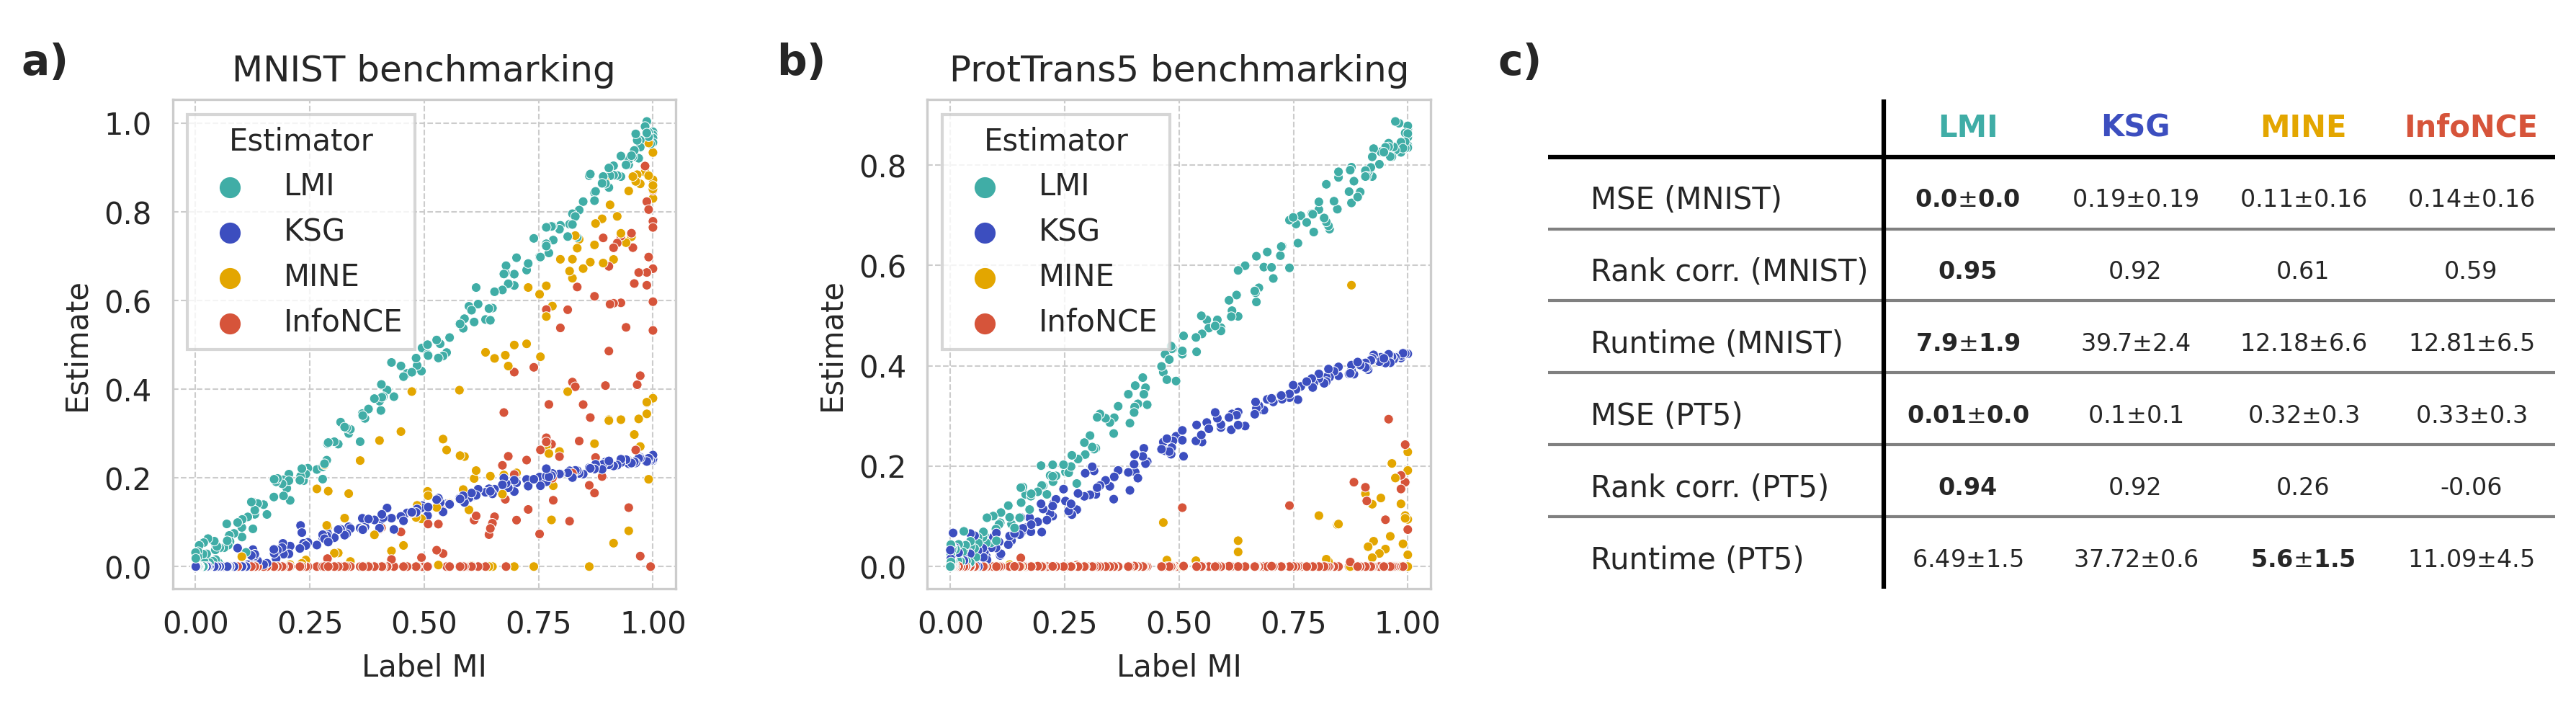

In [27]:
rcParams['grid.linewidth'] = 0.5
rcParams['grid.linestyle'] = 'dashed'
rcParams['legend.fancybox'] = False

fig = plt.figure(figsize=(12, 3), dpi=300)

mnist, blank, pt5, table = fig.subfigures(1, 4, wspace=-0.15,
                                  width_ratios= (1, .5, 1, 2))

ax = table.subplots()
ax_pt5 = pt5.subplots()
ax_mnist = mnist.subplots()

letter_annotation(ax, -0.05, 1.05, 'c)')
letter_annotation(ax_pt5, -0.3, 1.05, 'b)')
letter_annotation(ax_mnist, -0.3, 1.05, 'a)')

ncols = 4
nrows = 6

ax.set_ylim(-0.2, 3.2)
ax.set_xlim(0, 6.)

col_start = 3
row_size = .5

positions = [2.5, 3.5, 4.5, 5.5]

for i, c in enumerate(hue_order):
    ax.annotate(
            xy=(positions[i], nrows*row_size),
            text = hue_order[i],
            ha='center',
            va='center',
            weight='bold',
            color=palette[i]
        )
    
df = pd.read_csv('B_MNIST.csv', index_col=0)
df = df.fillna(0)
df = df.rename(columns={'Measure':'Estimator'})
df['Estimator'] = df['Estimator'].str.replace('LMI-Cross', 'LMI')
df['Estimate'] = [max(x, 0) for x in df['Estimate'].values]
df = df[df['Estimator'].isin(hue_order)]

#################################
########## SCATTERPLOT ##########
#################################
sns.set_style('whitegrid')
sns.scatterplot(data=df, x="Label MI", y="Estimate", hue="Estimator",
                hue_order=hue_order,
               palette=palette, s=10, ax=ax_mnist)
ax_mnist.set_title('MNIST benchmarking')

# Add MSE

# row label
ax.annotate(
        xy=(0.25, row_size*(nrows-1)),
        text='MSE (MNIST)',
        ha='left',
        va='center'
        )
best_val = min([mean_squared_error(df[df["Estimator"] == est]["Label MI"], 
                           df[df["Estimator"] == est]["Estimate"]) for est in hue_order])
for j, est in enumerate(hue_order):
    val = mean_squared_error(df[df["Estimator"] == est]["Label MI"], 
                           df[df["Estimator"] == est]["Estimate"])

    sd = ((df[df["Estimator"] == est]["Label MI"]- df[df["Estimator"] == est]["Estimate"])**2).std()
    weight = 'normal'*(best_val!=val) + 'bold'*(best_val==val)
    ax.annotate(
            xy=(positions[j], row_size*(nrows-1)),
            text = str(np.round(val, 2)) + r'$\pm$' + str(np.round(sd, 2)),
            ha='center',
            va='center',
            weight=weight, fontsize=8
        )
    
# Add Kendall

# row label
ax.annotate(
        xy=(0.25, row_size*(nrows-2)),
        text='Rank corr. (MNIST)',
        ha='left',
        va='center'
        )

best_val = max([kendalltau(df[df["Estimator"] == est]["Label MI"], 
                           df[df["Estimator"] == est]["Estimate"])[0] for est in hue_order])

for j, est in enumerate(hue_order):
    val = kendalltau(df[df["Estimator"] == est]["Label MI"], 
                           df[df["Estimator"] == est]["Estimate"])[0]
    weight = 'normal'*(best_val!=val) + 'bold'*(best_val==val) 
    ax.annotate(
            xy=(positions[j], row_size*(nrows-2)),
            text = np.round(val, 2),
            ha='center',
            va='center',
            weight=weight, fontsize=8
        )
    
# Add time

# row label
ax.annotate(
        xy=(0.25, row_size*(nrows-3)),
        text='Runtime (MNIST)',
        ha='left',
        va='center'
        )

best_val = df.groupby('Estimator')['Time'].mean().min()
for j, est in enumerate(hue_order):
    val = df[df["Estimator"] == est]["Time"].mean()
    sd = df[df["Estimator"] == est]["Time"].std()
    weight = 'normal'*(best_val!=val) + 'bold'*(best_val==val)
    ax.annotate(
            xy=(positions[j], row_size*(nrows-3)),
            text = str(np.round(val, 2)) + r'$\pm$' + str(np.round(sd, 1)),
            ha='center',
            va='center',
            weight=weight, fontsize=8)


df = pd.read_csv('B_species_mixing.csv', index_col=0)
df = df.fillna(0)
df = df.rename(columns={'Measure':'Estimator'})
df['Estimator'] = df['Estimator'].str.replace('SIMI-Cross', 'SIMI')
df = df[df['Estimator'].isin(hue_order)]
df['Estimate'] = [max(x, 0) for x in df['Estimate'].values]


#################################
########## SCATTERPLOT ##########
#################################
sns.set_style('whitegrid')
sns.scatterplot(data=df, x="Label MI", y="Estimate", hue="Estimator",
                hue_order=hue_order,
               palette=palette, s=10, ax=ax_pt5)
ax_pt5.set_title('ProtTrans5 benchmarking')




############################
##### PT5 Table entries ####
############################

# Add MSE

# row label
ax.annotate(
        xy=(0.25, row_size*(nrows-4)),
        text='MSE (PT5)',
        ha='left',
        va='center'
        )
best_val = min([mean_squared_error(df[df["Estimator"] == est]["Label MI"], 
                           df[df["Estimator"] == est]["Estimate"]) for est in hue_order])
for j, est in enumerate(hue_order):
    val = mean_squared_error(df[df["Estimator"] == est]["Label MI"], 
                           df[df["Estimator"] == est]["Estimate"])
    sd = ((df[df["Estimator"] == est]["Label MI"]- df[df["Estimator"] == est]["Estimate"])**2).std()
    weight = 'normal'*(best_val!=val) + 'bold'*(best_val==val)
    ax.annotate(
            xy=(positions[j], row_size*(nrows-4)),
            text = str(np.round(val, 2)) + r'$\pm$' + str(np.round(sd, 1)),
            ha='center',
            va='center',
            weight=weight, fontsize=8
        )
    
# Add Kendall

# row label
ax.annotate(
        xy=(0.25, row_size*(nrows-5)),
        text='Rank corr. (PT5)',
        ha='left',
        va='center'
        )

best_val = max([kendalltau(df[df["Estimator"] == est]["Label MI"], 
                           df[df["Estimator"] == est]["Estimate"])[0] for est in hue_order])

for j, est in enumerate(hue_order):
    val = kendalltau(df[df["Estimator"] == est]["Label MI"], 
                           df[df["Estimator"] == est]["Estimate"])[0]
    weight = 'normal'*(best_val!=val) + 'bold'*(best_val==val) 
    ax.annotate(
            xy=(positions[j], row_size*(nrows-5)),
            text = np.round(val, 2),
            ha='center',
            va='center',
            weight=weight, fontsize=8
        )
    
# Add time

# row label
ax.annotate(
        xy=(0.25, row_size*(nrows-6)),
        text='Runtime (PT5)',
        ha='left',
        va='center'
        )

best_val = df.groupby('Estimator')['Time'].mean().min()
for j, est in enumerate(hue_order):
    val = df[df["Estimator"] == est]["Time"].mean()
    sd = df[df["Estimator"] == est]["Time"].std()
    weight = 'normal'*(best_val!=val) + 'bold'*(best_val==val)
    ax.annotate(
            xy=(positions[j], row_size*(nrows-6)),
            text = str(np.round(val, 2)) + r'$\pm$' + str(np.round(sd, 1)),
            ha='center',
            va='center',
            weight=weight, fontsize=8)
    
# Add dividing lines
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], 
        [nrows*row_size-0.2, nrows*row_size-0.2], lw=1.5, color='black', marker='', zorder=4)

ax.plot([2,2], 
        [ax.get_ylim()[0], ax.get_ylim()[1]], lw=1.5, 
        color='black', marker='', zorder=4)

for x in range(1, nrows):
    ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], 
            [x*row_size-0.2, x*row_size-0.2], 
            lw=1., color='gray', ls='-', zorder=3 , marker='')
        
ax.set_axis_off()